In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# shape of dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (200, 5)


In [ ]:
# missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Statistical summary
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


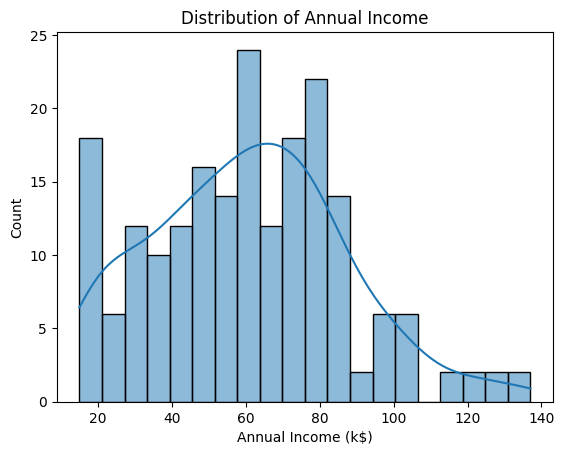

In [6]:
# Visualize the distribution of Annual Income
plt.figure()
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

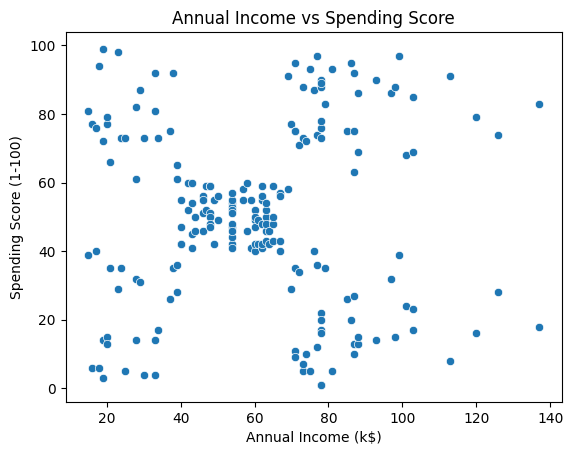

In [7]:
# Visualize the relationship between Annual Income and Spending Score
plt.figure()
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)']
)
plt.title("Annual Income vs Spending Score")
plt.show()


In [8]:
# feature selection and scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = {}

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score
    print(f"k = {k}, Silhouette Score = {score:.4f}")


k = 2, Silhouette Score = 0.3213
k = 3, Silhouette Score = 0.4666
k = 4, Silhouette Score = 0.4939
k = 5, Silhouette Score = 0.5547
k = 6, Silhouette Score = 0.5399
k = 7, Silhouette Score = 0.5281
k = 8, Silhouette Score = 0.4552


In [10]:
# Identify the best number of clusters
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nBest number of clusters:", best_k)



Best number of clusters: 5


In [11]:
# Final clustering with the best k
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = final_kmeans.fit_predict(X_scaled)


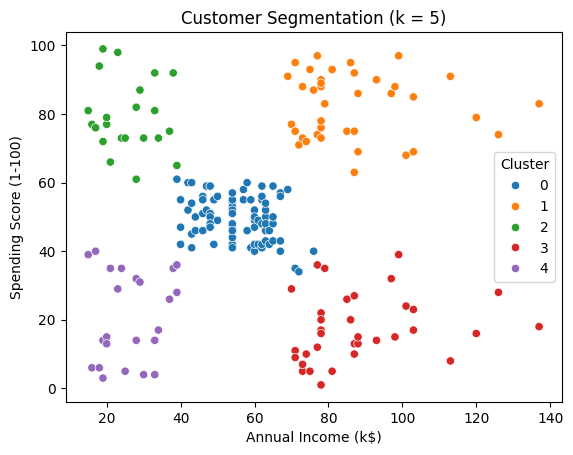

In [12]:
# Visualize the clustered data
plt.figure()
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title(f"Customer Segmentation (k = {best_k})")
plt.show()


In [13]:
# Final Silhouette Score
print("Final Silhouette Score:", silhouette_scores[best_k])


Final Silhouette Score: 0.5546571631111091


In [14]:
from IPython.display import Markdown, display

# build markdown summary of clusters
centers = scaler.inverse_transform(final_kmeans.cluster_centers_)
clusters = sorted(df['Cluster'].unique())

md_lines = [
    f"# Cluster summary (k={best_k})",
    f"- Silhouette Score: {silhouette_scores[best_k]:.4f}",
    "",
    "|Cluster|Count|Avg Age|Avg Income (k$)|Avg Spending|% Male|% Female|Center Income|Center Spending|",
    "|---:|---:|---:|---:|---:|---:|---:|---:|---:|"
]

for c in clusters:
    sub = df[df['Cluster'] == c]
    cnt = len(sub)
    avg_age = sub['Age'].mean()
    avg_inc = sub['Annual Income (k$)'].mean()
    avg_sp = sub['Spending Score (1-100)'].mean()
    pct_m = 100 * (sub['Gender'] == 'Male').mean()
    pct_f = 100 * (sub['Gender'] == 'Female').mean()
    center_inc, center_sp = centers[c]
    md_lines.append(
        f"|{c}|{cnt}|{avg_age:.1f}|{avg_inc:.1f}|{avg_sp:.1f}|{pct_m:.1f}%|{pct_f:.1f}%|{center_inc:.1f}|{center_sp:.1f}|"
    )

md_text = "\n".join(md_lines)

# display and save
display(Markdown(md_text))
with open("cluster_summary.md", "w") as f:
    f.write(md_text)

# Cluster summary (k=5)
- Silhouette Score: 0.5547

|Cluster|Count|Avg Age|Avg Income (k$)|Avg Spending|% Male|% Female|Center Income|Center Spending|
|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|0|81|42.7|55.3|49.5|40.7%|59.3%|55.3|49.5|
|1|39|32.7|86.5|82.1|46.2%|53.8%|86.5|82.1|
|2|22|25.3|25.7|79.4|40.9%|59.1%|25.7|79.4|
|3|35|41.1|88.2|17.1|54.3%|45.7%|88.2|17.1|
|4|23|45.2|26.3|20.9|39.1%|60.9%|26.3|20.9|